Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train")
data_dir_test = pathlib.Path('gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2249
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 2249 files belonging to 9 classes.
Using 1800 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset="validation",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 2249 files belonging to 9 classes.
Using 449 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

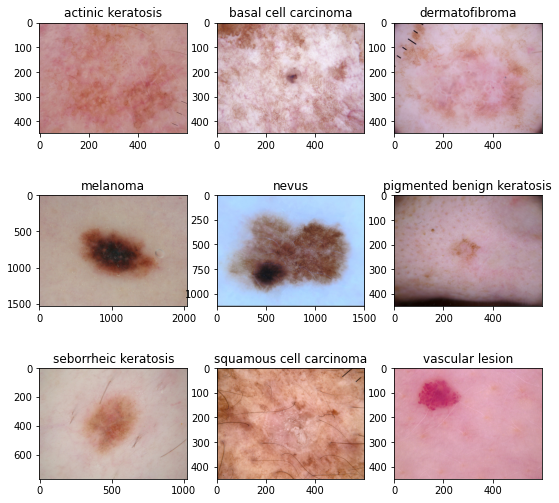

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



##### using "sparse_categorical_crossentropy" as output is has 9 classes of categorical variables
##### using "adam" optimizer 

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 320s 2s/step - loss: 2.0316 - accuracy: 0.2100 - val_loss: 1.8589 - val_accuracy: 0.3163
Epoch 2/20
57/57 [==============================] - 3s 57ms/step - loss: 1.8597 - accuracy: 0.3050 - val_loss: 1.8880 - val_accuracy: 0.2851
Epoch 3/20
57/57 [==============================] - 3s 57ms/step - loss: 1.6305 - accuracy: 0.4083 - val_loss: 1.7343 - val_accuracy: 0.4031
Epoch 4/20
57/57 [==============================] - 3s 58ms/step - loss: 1.5888 - accuracy: 0.4544 - val_loss: 1.5897 - val_accuracy: 0.4477
Epoch 5/20
57/57 [==============================] - 3s 58ms/step - loss: 1.5235 - accuracy: 0.4694 - val_loss: 1.5154 - val_accuracy: 0.5212
Epoch 6/20
57/57 [==============================] - 3s 58ms/step - loss: 1.4548 - accuracy: 0.4878 - val_loss: 1.5044 - val_accuracy: 0.4343
Epoch 7/20
57/57 [==============================] - 3s 58ms/step - loss: 1.3870 - accuracy: 0.5139 - val_loss: 1.5175 - val_accuracy: 0.4744
Epoch 8/20
57

### Visualizing training results

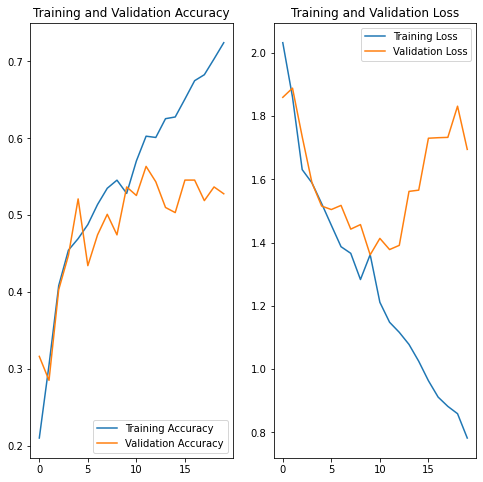

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings from first model
##### 1)we see that model is overfitting beyond after 10th epoch training accuracy is increasing up to 70% but validation accuracy is remaning constant at ~50% 
##### 2)even loss function is showing difference in traning and validation set data beyond 10th epoch

### Write your findings here

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = tf.keras.Sequential([layers.Rescaling(1./255),
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])


##### Using data augmentation random flip and rotation

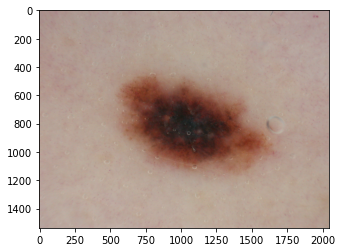

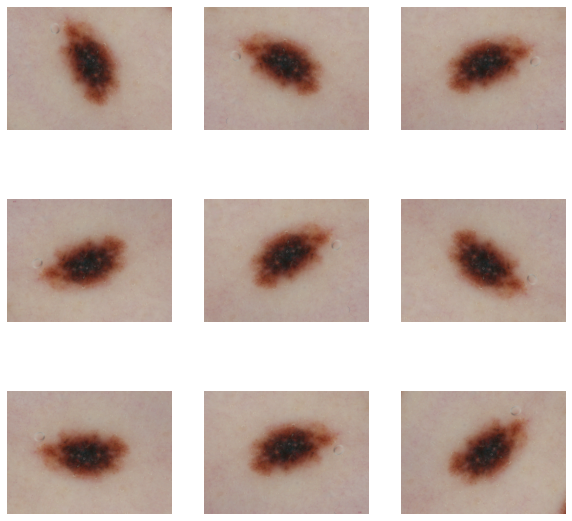

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
import random
from numpy import expand_dims
image = plt.imread(str(list(data_dir_train.glob('melanoma'+'/*.jpg'))[1]))
plt.imshow(image)

image = tf.cast(tf.expand_dims(image, 0), tf.float32)
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")


### Todo:
### Create the model, compile and train the model



In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([data_augmentation,layers.experimental.preprocessing.Rescaling(1./1,input_shape=(img_height, img_width,3))])
### note: rescaling was done 1/255 during data augmentation , here just adding layer to reshape input
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compiling the model

In [19]:
## Your code goes here
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 5s 63ms/step - loss: 2.0196 - accuracy: 0.2244 - val_loss: 1.9012 - val_accuracy: 0.3163
Epoch 2/20
57/57 [==============================] - 3s 59ms/step - loss: 1.8831 - accuracy: 0.2989 - val_loss: 1.7196 - val_accuracy: 0.3586
Epoch 3/20
57/57 [==============================] - 3s 59ms/step - loss: 1.6426 - accuracy: 0.3922 - val_loss: 1.7201 - val_accuracy: 0.3942
Epoch 4/20
57/57 [==============================] - 3s 60ms/step - loss: 1.5735 - accuracy: 0.4450 - val_loss: 1.5748 - val_accuracy: 0.4076
Epoch 5/20
57/57 [==============================] - 3s 60ms/step - loss: 1.5348 - accuracy: 0.4550 - val_loss: 1.5817 - val_accuracy: 0.4209
Epoch 6/20
57/57 [==============================] - 3s 60ms/step - loss: 1.4976 - accuracy: 0.4828 - val_loss: 1.5142 - val_accuracy: 0.4521
Epoch 7/20
57/57 [==============================] - 3s 60ms/step - loss: 1.4780 - accuracy: 0.4972 - val_loss: 1.4735 - val_accuracy: 0.4744
Epoch 8/20
57

### Visualizing the results

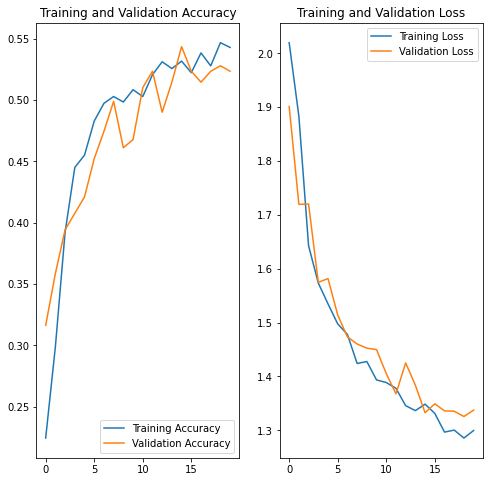

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings from second model( using data augmentation & drop out layers in base model)
##### 1) by using "data aumentation" and "drop out" layer we see traning and validation accuracy in similar range, even loss function is similar for both, so overfitting is addresed to some extent
##### 2) But overall accuracy is still lower i.e close to 55% for both training and validation

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

{'melanoma': 438, 'vascular lesion': 139, 'actinic keratosis': 114, 'squamous cell carcinoma': 181, 'nevus': 357, 'basal cell carcinoma': 376, 'pigmented benign keratosis': 472, 'dermatofibroma': 95, 'seborrheic keratosis': 77}


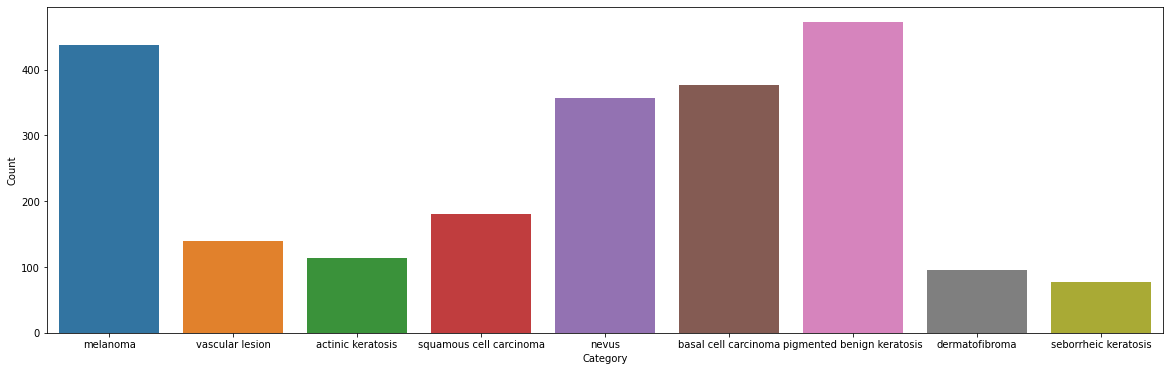

In [22]:
## Your code goes here.
import seaborn as sns
import matplotlib.pyplot as plt
dic = {}
cat=[]
no=[]
for subdir,dirs,files in os.walk(data_dir_train):
    cn = os.path.basename(subdir)
    if cn==os.path.basename(data_dir_train):
        continue
    l = len(files)
    dic[cn] = l
    cat.append(cn)
    no.append(l)
print(dic) 
df = pd.DataFrame()
df['Category']=cat
df['Count']=no
plt.figure(figsize=[20,6])
sns.barplot(data=df,x='Category',y='Count')

### From above plot we can clearly see there is class imbalance in data, data is ranging 77 data points to 472 data points per class
#### - Which class has the least number of samples?
### - Answer: "seborrheic keratosis" class has least number of samples 
#### - Which classes dominate the data in terms proportionate number of samples?
### - Answer: "pigmented benign keratosis" class has highest number of samples (~20% samples in one class)


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [23]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [24]:
path_to_training_dataset="gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5E5453BC90>: 100%|██████████| 500/500 [00:20<00:00, 24.82 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5E554F9AD0>: 100%|██████████| 500/500 [00:21<00:00, 23.20 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5EEA7B1B50>: 100%|██████████| 500/500 [00:24<00:00, 20.30 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=963x629 at 0x7F5E5544F090>: 100%|██████████| 500/500 [01:34<00:00,  5.27 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5E54595110>: 100%|██████████| 500/500 [01:30<00:00,  5.53 Samples/s]


Initialised with 472 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5E554D8A10>: 100%|██████████| 500/500 [00:19<00:00, 25.92 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5E554D80D0>: 100%|██████████| 500/500 [00:42<00:00, 11.88 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5E55505BD0>: 100%|██████████| 500/500 [00:18<00:00, 27.34 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5E544FA610>: 100%|██████████| 500/500 [00:18<00:00, 27.40 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [25]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)


4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [26]:

import os
import PIL
import glob
data_dir_train = pathlib.Path("gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train")
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list


['gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/melanoma/output/melanoma_original_ISIC_0010583.jpg_ac17fd9b-f0fc-4d89-9efe-5a571fb96315.jpg',
 'gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/melanoma/output/melanoma_original_ISIC_0000303.jpg_039012eb-7ce3-4d92-b96d-4b4934dc72b7.jpg',
 'gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/melanoma/output/melanoma_original_ISIC_0000551.jpg_15edf713-c42a-411e-83b1-c73114787cc5.jpg',
 'gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/melanoma/output/melanoma_original_ISIC_0010750.jpg_a6abfae9-93a5-48b9-b7e9-0fdf5ea0125b.jpg',
 'gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/melanoma/output/melanoma_original_ISIC_0010217.jpg_abe62ba2-efbf-4b0e-91cb-115067a193d2.jpg',
 'gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/melanoma/output/melanoma_original_ISIC_0000172.jpg_b765c85d-a958-4fdf-8f79-45e969982aef.jpg',
 'gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train/melanoma/output/melanoma_original_ISI

In [27]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [28]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [29]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
##new_df = original_df.append(df2)

In [30]:
df2['Label'].value_counts()

melanoma                      500
vascular lesion               500
actinic keratosis             500
squamous cell carcinoma       500
nevus                         500
basal cell carcinoma          500
pigmented benign keratosis    500
dermatofibroma                500
seborrheic keratosis          500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [31]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [32]:
data_dir_train= pathlib.Path("gdrive/My Drive/Colab Notebooks/Skin_cancer_ISIC/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6749 files belonging to 9 classes.
Using 5400 files for training.


#### **Todo:** Create a validation dataset

In [33]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6749 files belonging to 9 classes.
Using 1349 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [39]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [40]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#### **Todo:**  Train your model

In [41]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 32s 178ms/step - loss: 1.6473 - accuracy: 0.3794 - val_loss: 2.0710 - val_accuracy: 0.2246
Epoch 2/30
169/169 [==============================] - 31s 177ms/step - loss: 1.3989 - accuracy: 0.4844 - val_loss: 1.8957 - val_accuracy: 0.2328
Epoch 3/30
169/169 [==============================] - 31s 177ms/step - loss: 1.3065 - accuracy: 0.5228 - val_loss: 2.1942 - val_accuracy: 0.3291
Epoch 4/30
169/169 [==============================] - 32s 184ms/step - loss: 1.1506 - accuracy: 0.5767 - val_loss: 1.1873 - val_accuracy: 0.5789
Epoch 5/30
169/169 [==============================] - 31s 176ms/step - loss: 1.0256 - accuracy: 0.6231 - val_loss: 1.7370 - val_accuracy: 0.4329
Epoch 6/30
169/169 [==============================] - 31s 177ms/step - loss: 0.9558 - accuracy: 0.6615 - val_loss: 1.4662 - val_accuracy: 0.5256
Epoch 7/30
169/169 [==============================] - 31s 178ms/step - loss: 0.8525 - accuracy: 0.6980 - val_loss: 1.9399 - val_ac

#### **Todo:**  Visualize the model results

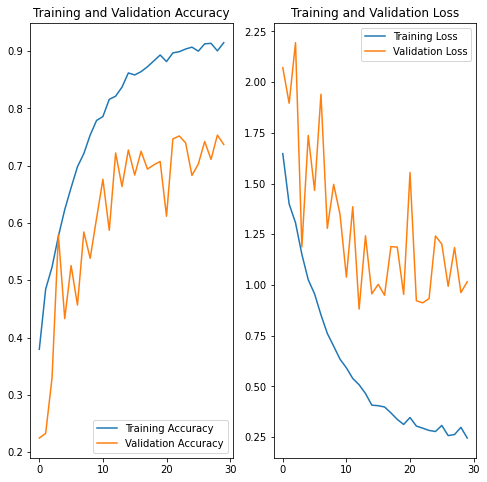

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings from model 3 ( having augmentation , class balance , using layer batch normalization )
##### 1) We see that addressing class imbalance issue using augmentation did help in improved overall accuracy of model 
##### 2) Accuracy improved from ~55% to 75 % in validation set and ~55% to ~90% in tranining set
##### 3) model can still be improved by hyper parameter tuning of adding more neurons,layers,dropout 